In [2]:
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from random import random, seed
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [3]:
sns.set_theme(style='whitegrid')

In [8]:
# Make data
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
x, y = np.meshgrid(x,y)

# we turn our (100, 100)-arrays into (10000,)-arrays
x = x.ravel()
y = y.ravel()


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

Function for plotting the data:

In [50]:
def plotting_test_values(X, z, z_pred, n):
    sort_idx = np.argsort(X[:,0])
    X_sorted = X[sort_idx]
    z_sorted = z[sort_idx]
    z_pred_sorted = z_pred[sort_idx]


    m = int(X.shape[0]/n)
    x = X_sorted[:,0].reshape((m, n))
    y = X_sorted[:,1].reshape((m, n))
    z = z_sorted.reshape((m, n))
    z_pred_plot = z_pred_sorted.reshape((m, n))


    fig = plt.figure(figsize=(12, 6))

    # Plotting the Franke function
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(x, y, z)
    ax.set_title('Franke Function')

    # Plot the polynomial regression prediction
    ax = fig.add_subplot(122, projection='3d')
    ax.scatter(x, y, z_pred_plot)
    ax.set_title('Lasso Prediction')

c:\Users\maria\anaconda3\envs\fysstk3155\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.412e+01, tolerance: 6.603e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\maria\anaconda3\envs\fysstk3155\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.696e-01, tolerance: 6.603e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\maria\anaconda3\envs\fysstk3155\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

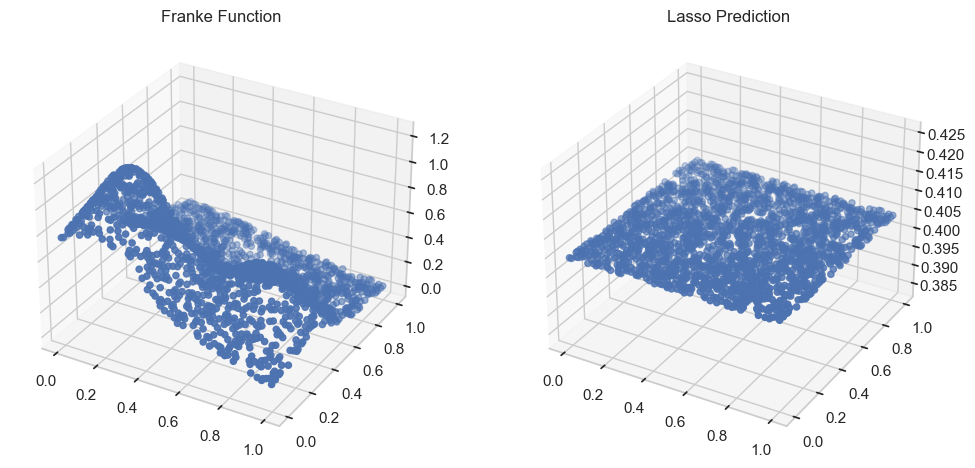

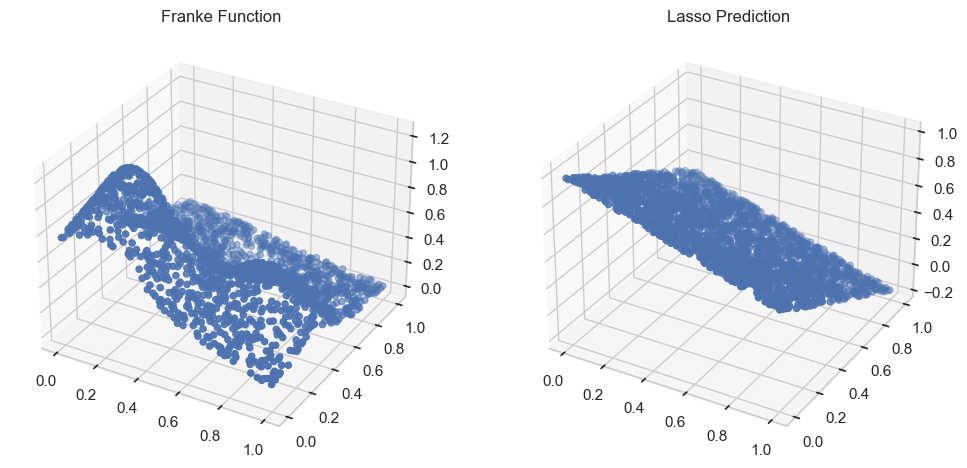

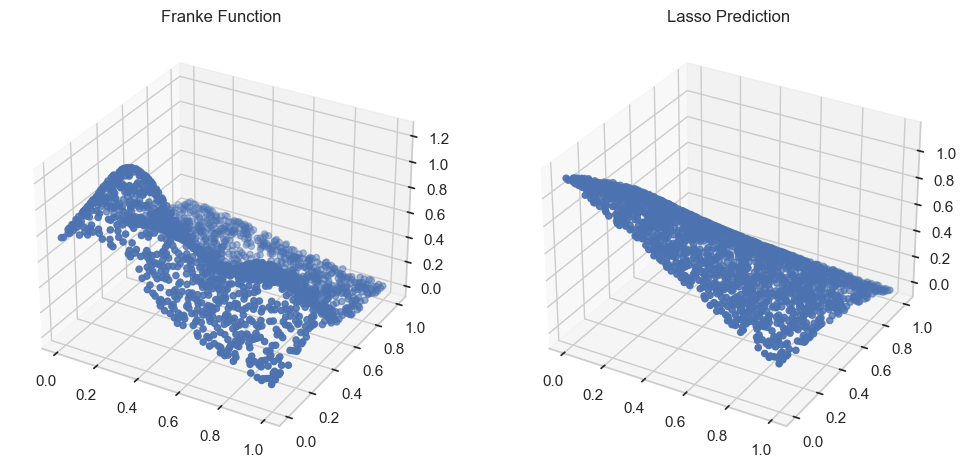

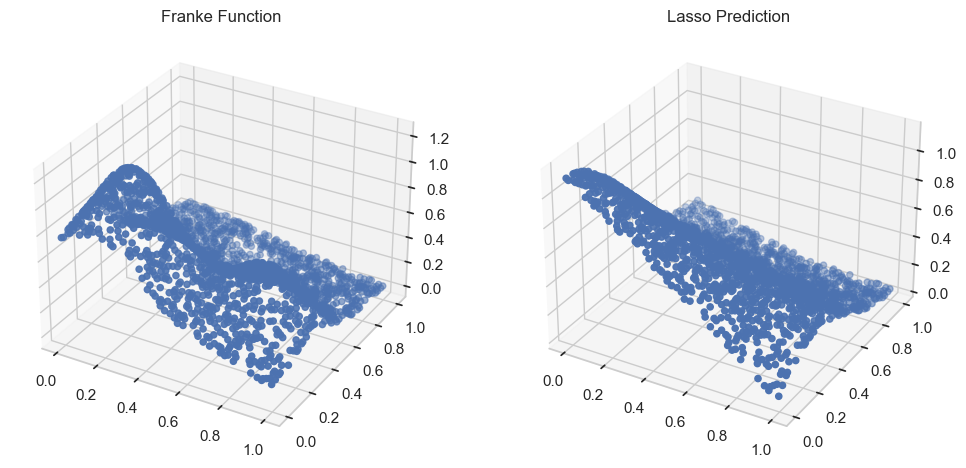

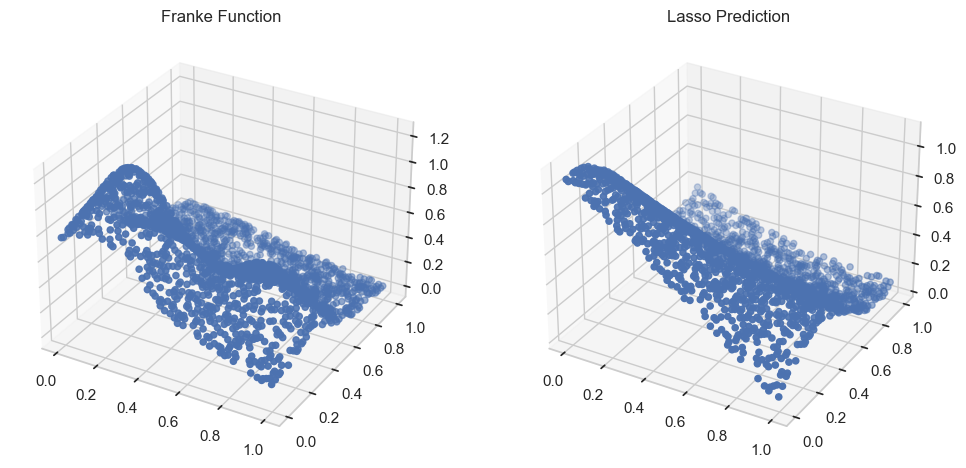

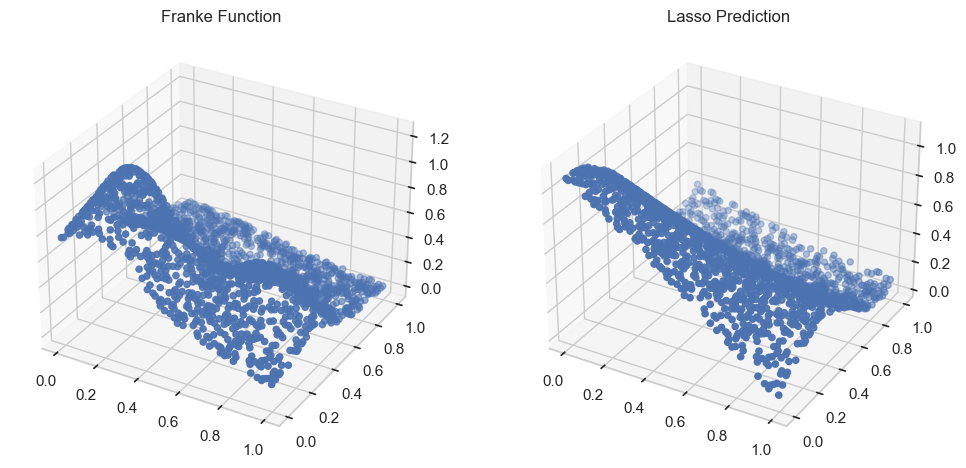

In [66]:
MSE_train, MSE_test = np.zeros((6, 6)), np.zeros((6, 6))
R2_train, R2_test = np.zeros((6, 6)), np.zeros((6, 6))
llambda = np.logspace(-4, 1, 6)
beta_values = []
intercept_values = []
max_degree = 5
for i in range(max_degree+1):
    # we stack the values of x and y beside each other
    X = np.column_stack((x,y))

    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=3)

    for idx, lmb in enumerate(llambda):
        # we use pipeline to fit our model
        pipeline = make_pipeline(
            PolynomialFeatures(degree=i),
            StandardScaler(),
            Lasso(alpha=lmb))

        pipeline.fit(X_train,z_train)
        z_tilde = pipeline.predict(X_train)
        z_predict = pipeline.predict(X_test)

        MSE_train[i][idx] = mean_squared_error(z_tilde, z_train)
        MSE_test[i][idx] = mean_squared_error(z_predict, z_test)
        R2_train[i][idx] = r2_score(z_tilde, z_train)
        R2_test[i][idx] = r2_score(z_predict, z_test)

        beta_values.append(pipeline.named_steps['lasso'].coef_)
        intercept_values.append(pipeline.named_steps['lasso'].intercept_)

        if idx == 1: 
            plotting_test_values(X_test, z_test, z_predict, 100)



In [67]:
print(beta_values)
print(intercept_values)

[array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([ 0.        , -0.14736267, -0.19353286]), array([ 0.        , -0.1464581 , -0.19262828]), array([ 0.        , -0.13741235, -0.18358254]), array([ 0.        , -0.04695487, -0.09312506]), array([ 0., -0., -0.]), array([ 0., -0., -0.]), array([ 0.        , -0.29877212, -0.211888  ,  0.02441896,  0.19550703,
       -0.11358935]), array([ 0.        , -0.2648432 , -0.20188873,  0.        ,  0.18114066,
       -0.11321961]), array([ 0.        , -0.16311841, -0.10390565, -0.        ,  0.03939344,
       -0.1090784 ]), array([ 0.        , -0.0376329 , -0.02148981, -0.        , -0.01421071,
       -0.06441681]), array([ 0., -0., -0., -0., -0., -0.]), array([ 0., -0., -0., -0., -0., -0.]), array([ 0.        , -0.19081404,  0.29882004, -0.34022628,  0.41016483,
       -1.71567237,  0.19574883,  0.08229325, -0.27518631,  1.15692142]), array([ 0.        , -0.29040881,  0.01358121, -0.02849048,  0.33035394,
       -0

In [ ]:
# Plotting beta coefficients
fig, axs = plt.subplots(2,3, figsize=(12, 6), sharex=True, sharey=True); fig.tight_layout()
axs = axs.flatten()

for i in range(len(axs)):
    axs[i].plot(N[:i+1], beta_values[i][:i+1], 'o-')
plt.show()